In [1]:
# Importing libraries and 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# importing data

data = pd.read_csv('hr-analytics.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.shape

(1470, 35)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#checking for null values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [12]:
#imbalanced data

In [13]:
data.skew() 


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [17]:
#Numerical Features
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [18]:
#Categorical Features
cat_features = ['BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','TrainingTimesLastYear','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

In [19]:
print("Number of numerical features in our dataset = ",len(num_features))

Number of numerical features in our dataset =  12


In [20]:
print("Number of categorical features in our dataset = ",len(cat_features))

Number of categorical features in our dataset =  18


No     1233
Yes     237
Name: Attrition, dtype: int64

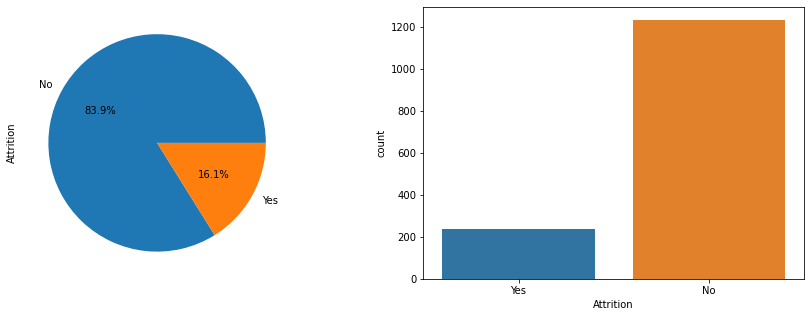

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Attrition'])
data['Attrition'].value_counts()

In [23]:
#61.1% is yes and 83.9% is no this is highly imbalance label class

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

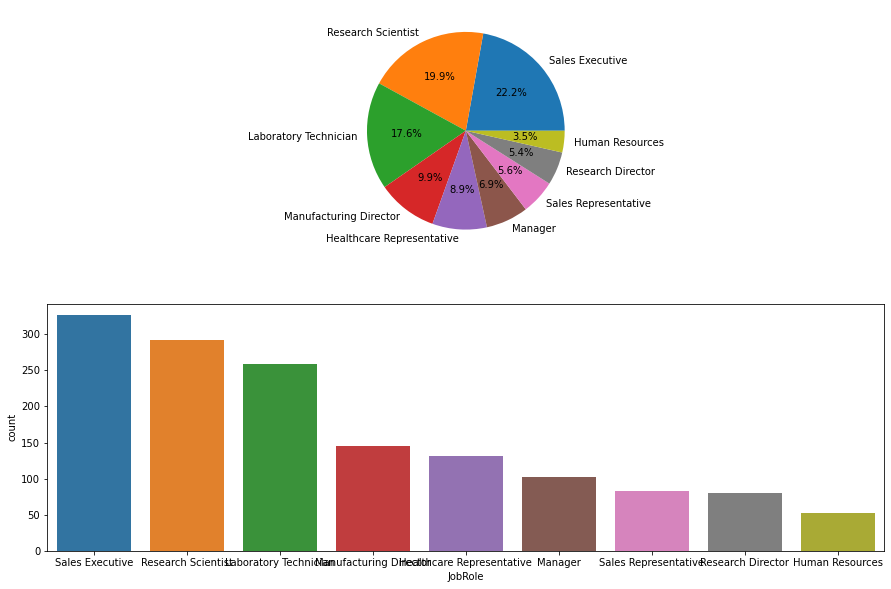

In [24]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
data['JobRole'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(data['JobRole'])
data['Department'].value_counts()

In [25]:
#only 3.5 are human resource and 9 job roles mostly sales executive

Maximum 60
Minimum 18


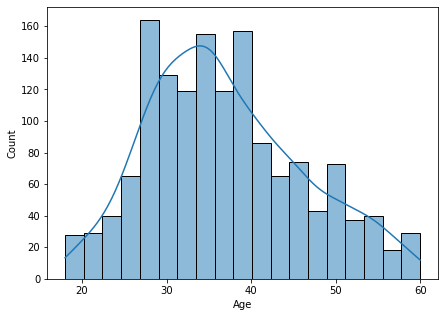

In [26]:
plt.figure(figsize=(7,5))
sns.histplot(data['Age'],kde=True)
print('Maximum',data['Age'].max())
print('Minimum',data['Age'].min())

Maximum 1499
Minimum 102


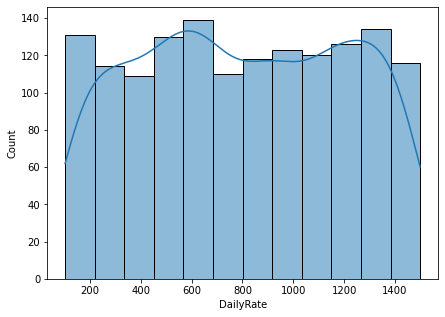

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(data['DailyRate'], kde=True)
print('Maximum', data['DailyRate'].max())
print('Minimum', data['DailyRate'].min())

Maximum 29
Minimum 1


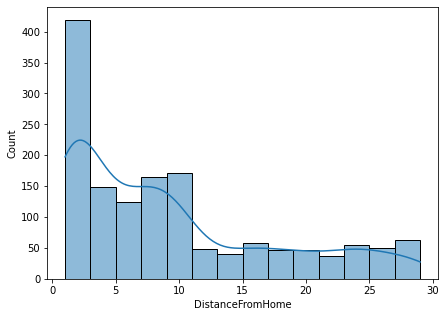

In [28]:
plt.figure(figsize=(7,5))
sns.histplot(data['DistanceFromHome'],kde=True)
print('Maximum',data['DistanceFromHome'].max())
print('Minimum',data['DistanceFromHome'].min())

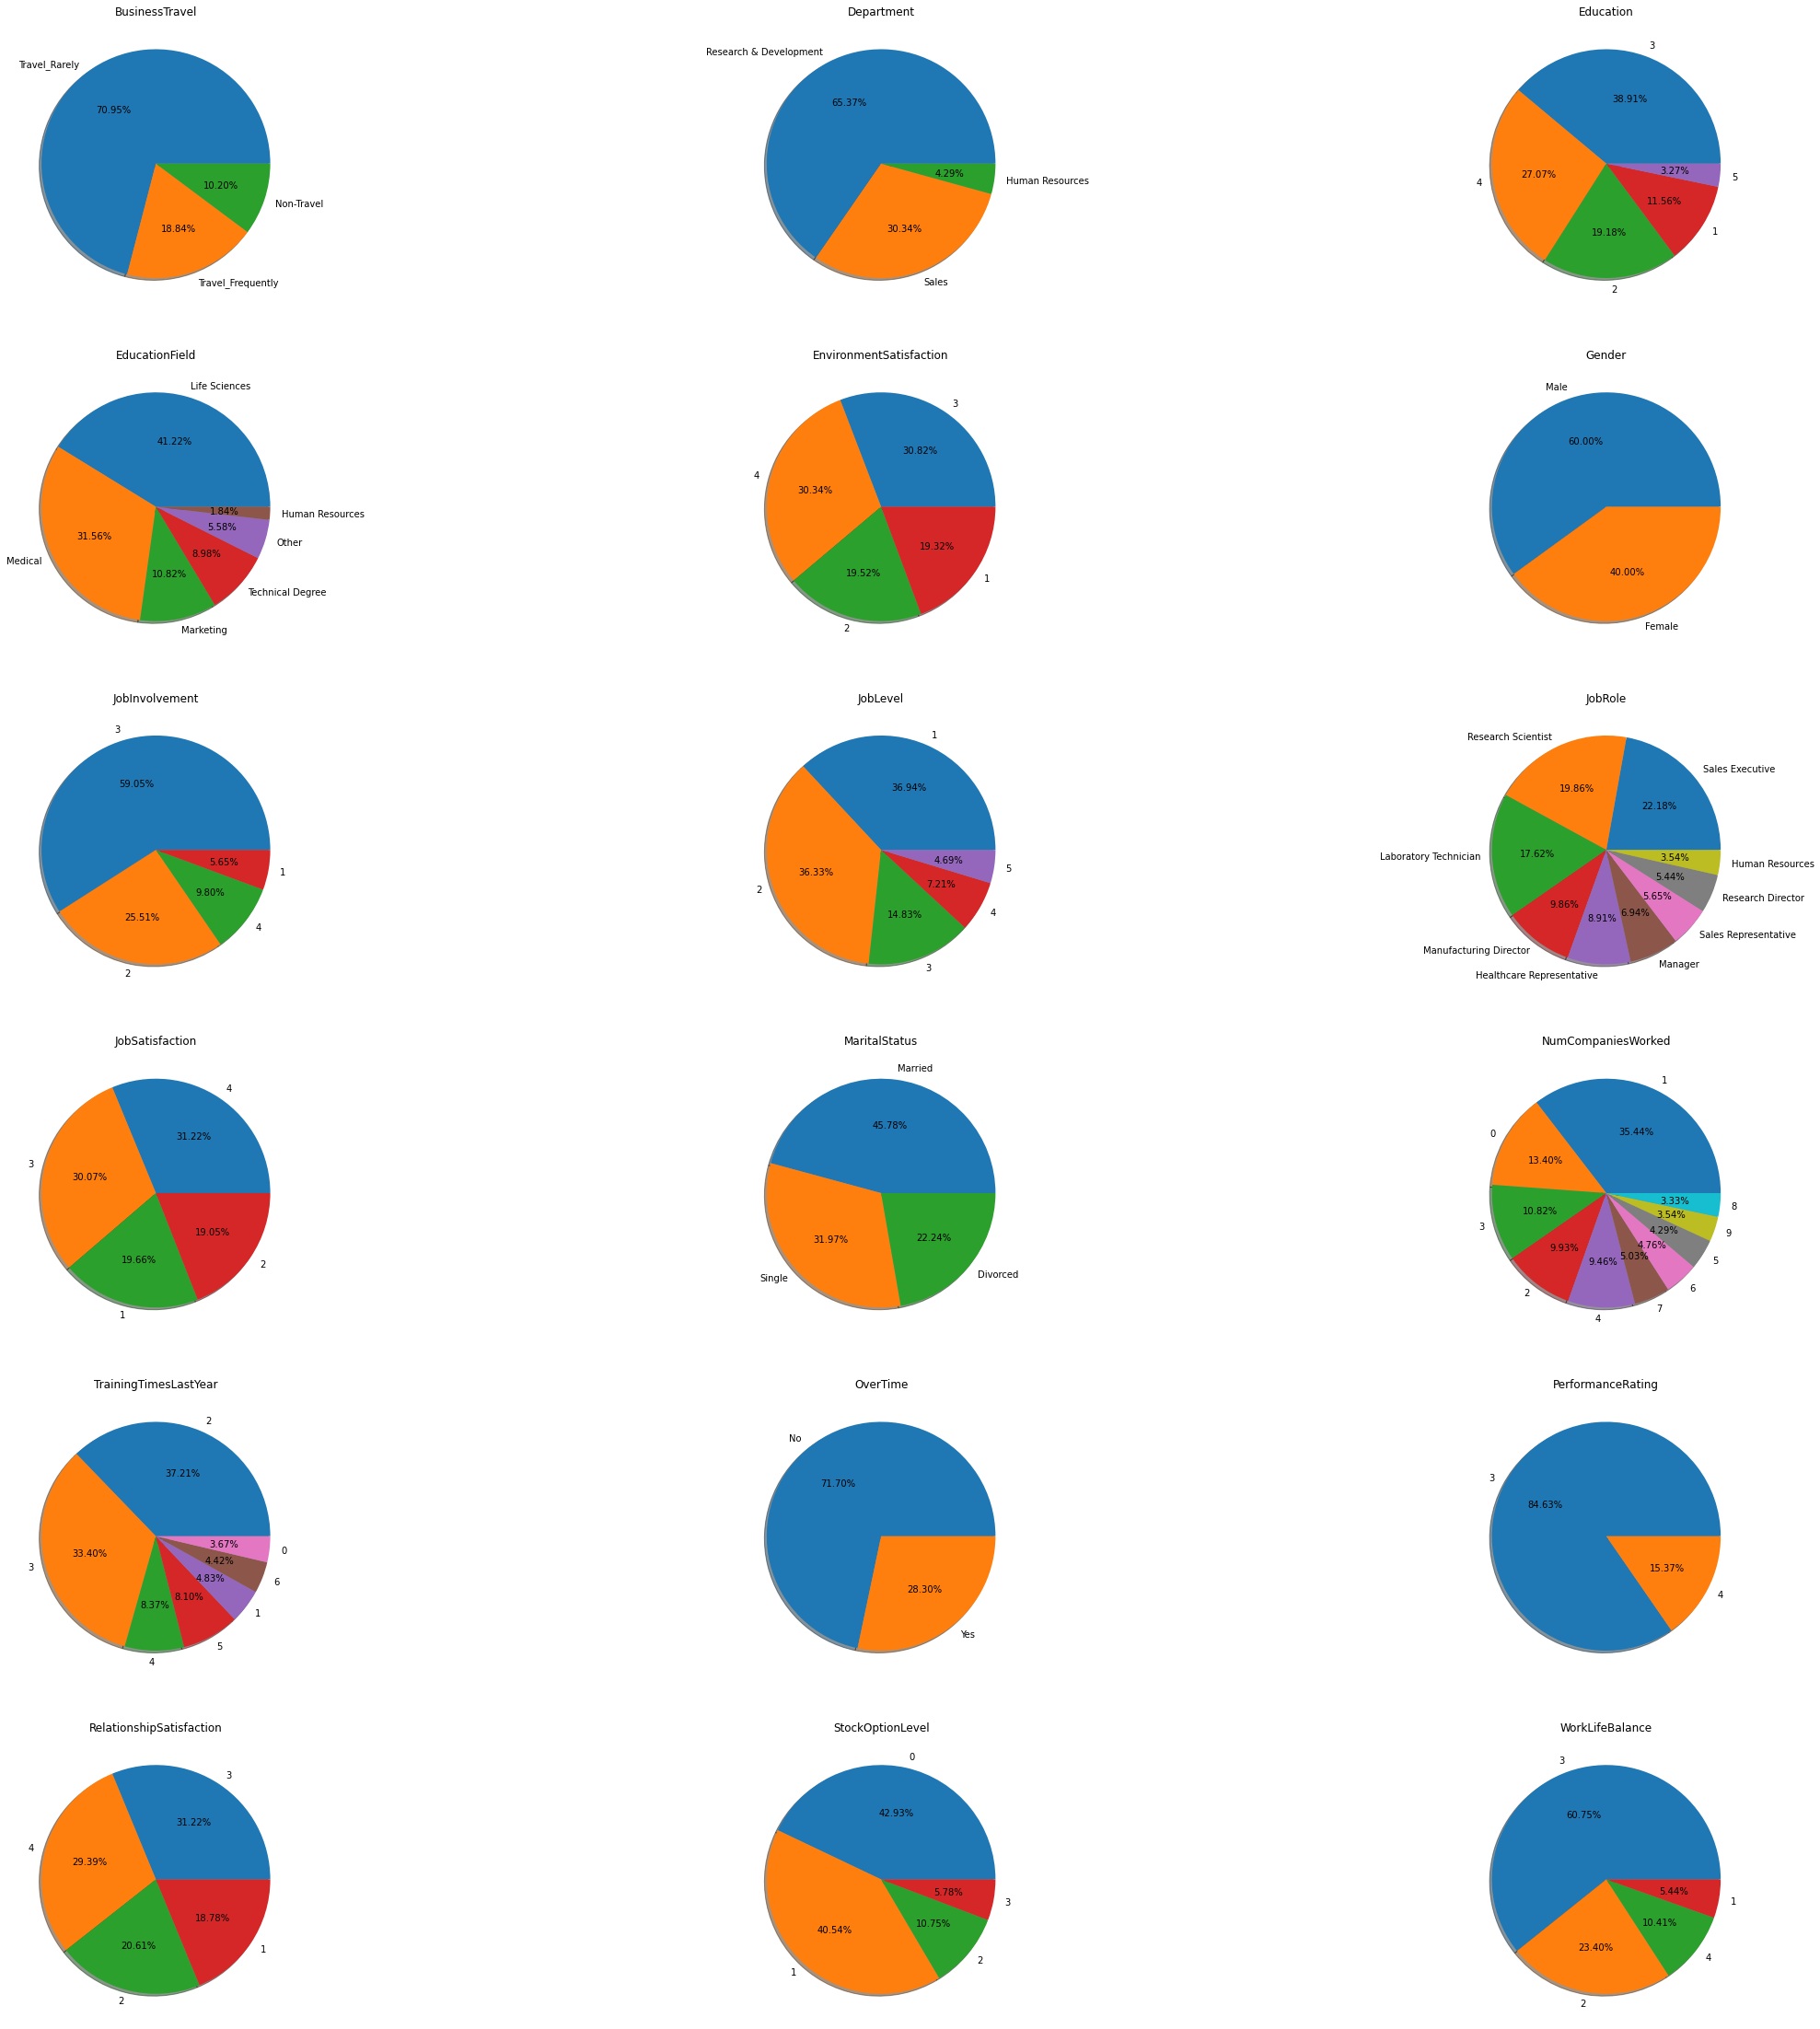

In [29]:
plt.figure(figsize = (40,40))
for i,feature in enumerate(cat_features):
    labels = data[feature].value_counts().index
    size = data[feature].value_counts().values
    ax = plt.subplot(6,3,i+1)
    ax.pie(size,labels = labels,shadow = True,autopct = "%.2f%%")
    plt.title(feature)
    ax.axis('off')

<AxesSubplot:>

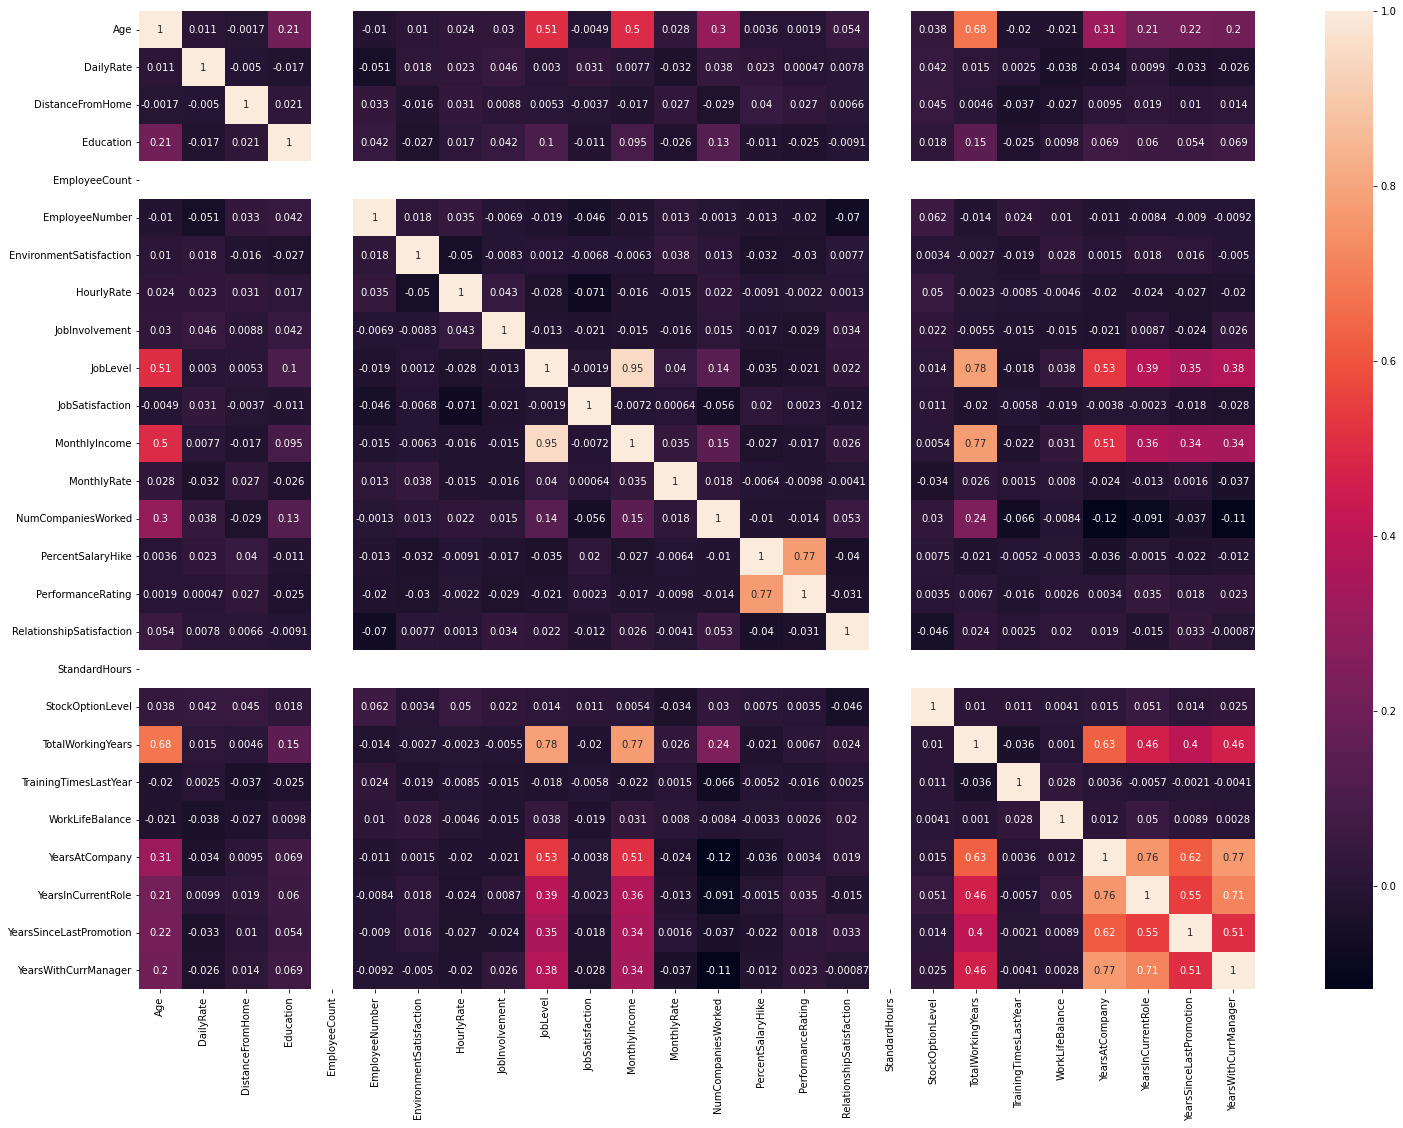

In [30]:
#checking correlation

plt.figure(figsize=(25,18))
sns.heatmap(data.corr(), annot=True)

In [31]:
data.drop(['JobLevel'],axis = 1,inplace = True)
data.drop(['TotalWorkingYears'],axis = 1,inplace = True)
data.drop(['PerformanceRating'],axis = 1,inplace = True)
data.drop(['YearsWithCurrManager'],axis = 1,inplace = True)
data.drop(['YearsInCurrentRole'],axis = 1,inplace = True)

In [32]:
cat_features.remove('JobLevel')
cat_features.remove('PerformanceRating')

In [33]:
cat_features

['BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'NumCompaniesWorked',
 'TrainingTimesLastYear',
 'OverTime',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [34]:
num_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [35]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,Y,Yes,11,1,80,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,Y,No,23,4,80,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,Y,Yes,15,2,80,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,Y,Yes,11,3,80,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,Y,No,12,4,80,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,Y,No,17,3,80,1,3,3,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,Y,No,15,1,80,1,5,3,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,Y,Yes,20,2,80,1,0,3,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,Y,No,14,4,80,0,3,2,9,0


In [36]:
le = LabelEncoder()
for feature in cat_features:
    data[feature] = le.fit_transform(data[feature])

In [37]:
sc = StandardScaler()
for feature in num_features:
    data[feature] = sc.fit_transform(np.array(data[feature]).reshape(-1,1))

KeyError: 'TotalWorkingYears'

In [38]:
# error is not resolved and tying yet

In [39]:
data['Attrition'] = le.fit_transform(data['Attrition'])

In [40]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Over18,OverTime,PercentSalaryHike,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,0.446350,1,2,0.742527,2,-1.010909,1,1,1,1,...,Y,1,-1.150554,0,80,0,0,0,6,0
1,1.322365,0,1,-1.297775,1,-0.147150,0,1,1,2,...,Y,0,2.129306,3,80,1,3,2,10,1
2,0.008343,1,2,1.414363,1,-0.887515,1,4,1,4,...,Y,1,-0.057267,1,80,0,3,2,0,0
3,-0.429664,0,1,1.461466,1,-0.764121,3,1,1,5,...,Y,1,-1.150554,2,80,0,3,2,8,3
4,-1.086676,0,2,-0.524295,1,-0.887515,0,3,1,7,...,Y,0,-0.877232,3,80,1,3,2,2,2


In [41]:
#modeling

In [42]:
X = data.drop(['Attrition'],axis = 1)
y = data['Attrition']

In [43]:
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [44]:
# 5 models
skf = StratifiedKFold(n_splits = 5)
skf.get_n_splits(X,y)
accuracy=[]
mean_acc = []
classifiers=['Logistic Regression','Decision Tree','Naive Bayes','Linear SVM', 'Random Forest Classifier']
models=[LogisticRegression(),DecisionTreeClassifier(criterion = 'entropy',max_depth = 3),GaussianNB(),svm.SVC(kernel = 'linear'),RandomForestClassifier(n_estimators = 1000)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = skf,scoring = "accuracy")
    mean_acc.append(cv_result.mean())
    accuracy.append(cv_result)

In [45]:
models_acc_df = pd.DataFrame(accuracy,index = [classifiers])
cols = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5']
#models_acc_df.columns = cols
models_acc_df

,0,1,2,3,4
Logistic Regression,NaN,NaN,NaN,NaN,NaN
Decision Tree,NaN,NaN,NaN,NaN,NaN
Naive Bayes,NaN,NaN,NaN,NaN,NaN
Linear SVM,NaN,NaN,NaN,NaN,NaN
Random Forest Classifier,NaN,NaN,NaN,NaN,NaN
